In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# initialization
def initialize(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
# model
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [17]:
# cost function
def log_loss(A, y):
  eps = 1.e-15
  return 1 / len(y) * np.sum(-y * np.log(A + eps) - (1 - y) * np.log(1 - A + eps))

In [5]:
# gradient descent
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
def update(dw, db, w, b, lr):
  w = w - lr * dw
  b = b -lr * db
  
  return w, b

In [7]:
def predict(x, w, b):
  A = model(x, w, b)
  # print(A)

  return A >= .5

In [28]:
from tqdm import tqdm

In [33]:
from sklearn.metrics import accuracy_score

def artificial_nn(X_train, y_train, X_test,  y_test, lr=.1, n_iter=300):
  train_loss = []
  test_loss = []
  train_acc = []
  test_acc = []
  # initialize W, b
  W, b = initialize(X_train)

  for i in tqdm(range(n_iter)):
    # train_model
    A_train = model(X_train, W, b)

    if i % 10 == 0:
      # train loss
      train_loss.append(log_loss(A_train, y_train))

      # train accuracy
      y_pred_train = predict(X_train, W, b)
      train_acc.append(accuracy_score(y_train, y_pred_train))

      # test_model
      A_test = model(X_test, W, b)

       # test loss
      test_loss.append(log_loss(A_test, y_test))

      # test accuracy
      y_pred_test = predict(X_test, W, b)
      test_acc.append(accuracy_score(y_test, y_pred_test))

    # updates
    dW, db = gradients(A_train, X_train, y_train)
    W, b = update(dW, db, W, b, lr)
  
  plt.figure(figsize=(14,6))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='train loss')
  plt.plot(test_loss, label='test loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(train_acc, label='train acc')
  plt.plot(test_acc, label='test acc')
  plt.legend()
  plt.show()

  return W, b

In [9]:
from utilities import *

In [10]:
X_train, y_train, X_test, y_test = load_data()

In [11]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [12]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


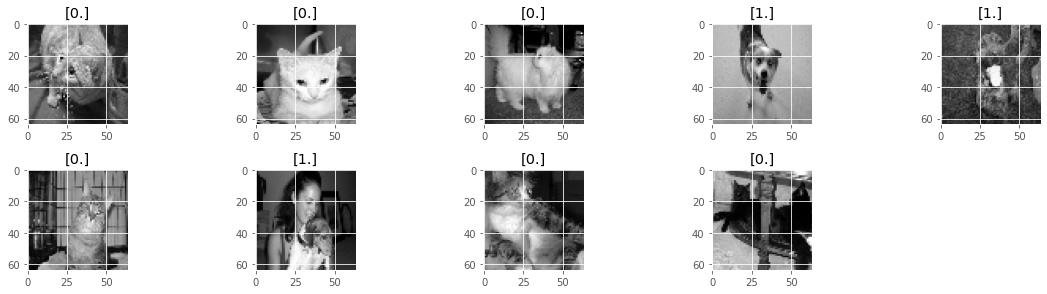

In [13]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [14]:
# X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] )
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)

X_train_reshape.shape, X_test_reshape.shape

((1000, 4096), (200, 4096))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Acuuracy: 0.516


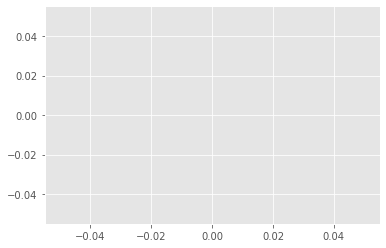

In [15]:
W, b = artificial_nn(X_train_reshape, y_train)

To avoid this we add an epsilon equal to 1e-15 to the log-loss function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Acuuracy: 0.515


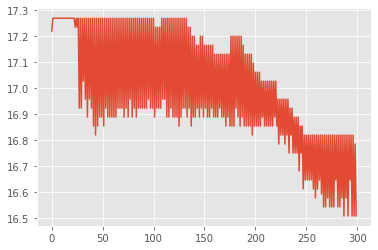

In [18]:
W, b = artificial_nn(X_train_reshape, y_train)

The best way is normalizing data

## Normalization

In [19]:
# MinMax
X_train_reshape = X_train_reshape / X_train.max()
X_test_reshape = X_test_reshape / X_train.max()

Acuuracy: 0.514


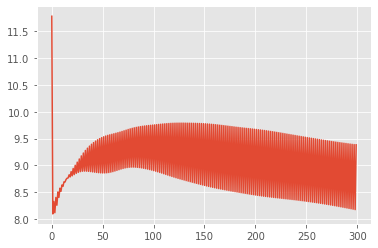

In [20]:
W, b = artificial_nn(X_train_reshape, y_train)

Acuuracy: 0.535


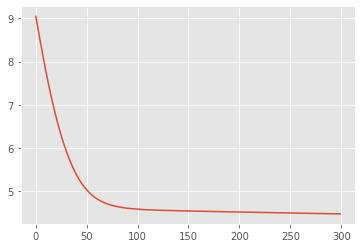

In [22]:
W, b = artificial_nn(X_train_reshape, y_train, lr=.001)

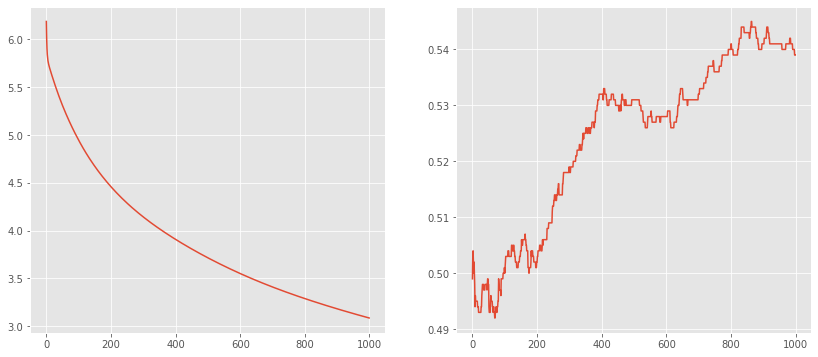

In [26]:
W, b = artificial_nn(X_train_reshape, y_train, lr=.01, n_iter=1000)

100%|██████████| 15000/15000 [01:39<00:00, 151.35it/s]


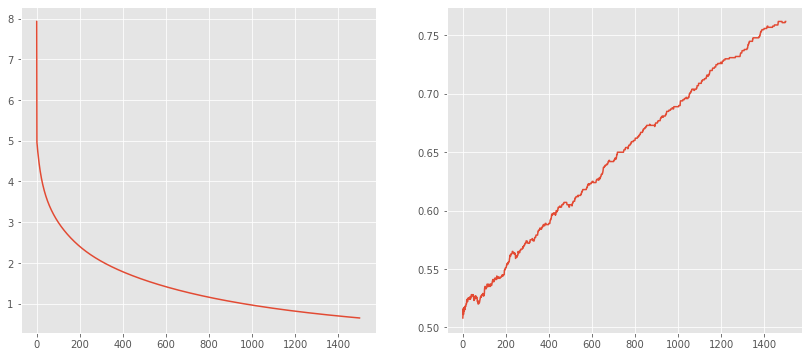

In [30]:
W, b = artificial_nn(X_train_reshape, y_train, lr=.01, n_iter=15000)

100%|██████████| 15000/15000 [01:42<00:00, 146.39it/s]


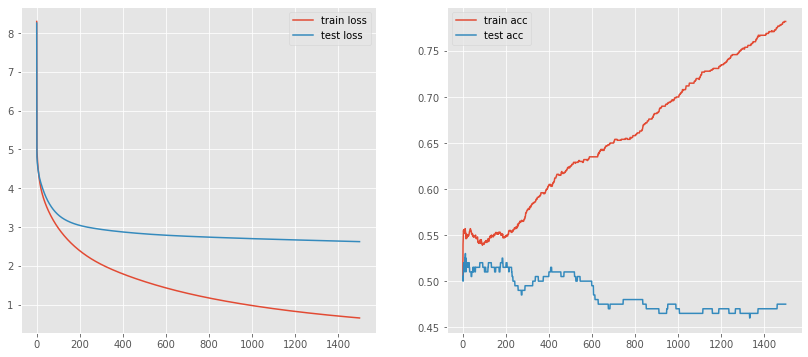

In [34]:
W, b = artificial_nn(X_train_reshape, 
                     y_train, 
                     X_test_reshape, 
                     y_test, 
                     lr=.01,
                     n_iter=15000
            )